<a href="https://colab.research.google.com/github/robbfo/data_science_certificate/blob/main/Dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3 - Dimensionality Reduction

This assignment is based on content discussed in module 6 and will work with the famous MNIST dataset, which is a set of images of handwritten digits https://en.wikipedia.org/wiki/MNIST_database.
The dataset has been provided to you in a .csv file.

## Learning outcomes

- Apply a Random Forest classification algorithm to MNIST dataset
- Perform dimensionality reduction of features using PCA and compare classification on the reduced dataset to that of original one
- Apply dimensionality reduction techniques: t-SNE and LLE

## Questions (15 points total)

__Question 1 (1 point).__ Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).

In [17]:
from sklearn.model_selection import train_test_split
import pandas as pd

df_mnist = pd.read_csv("mnist_dataset.csv", index_col=0)
train_df = df_mnist[:60000]
test_df = df_mnist[60000:]

print(f"Train set size: {len(train_df)}")
print(f"Test set size: {len(test_df)}")

Train set size: 60000
Test set size: 10000


In [18]:
train_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


__Question 2 (2 points).__ Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.

In [27]:
from sklearn.ensemble import RandomForestClassifier
import time

start_time = time.time()

rfc = RandomForestClassifier(random_state=123)
rfc.fit(train_df.loc[:, '1x1':], train_df.loc[:, 'label'])

print(f"Random Forest classifier score: {rfc.score(test_df.loc[:, '1x1':], test_df.loc[:, 'label'])} mean accuracy")
print(f"Time taken: {time.time() - start_time} seconds")

Random Forest classifier score: 0.9701 mean accuracy
Time taken: 48.86969780921936 seconds


__Question 3 (4 points).__ Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [33]:
from sklearn.decomposition import PCA
import numpy as np

pca_model = PCA(n_components=0.95)
mnist_train_pca = pca_model.fit_transform(train_df.loc[:, '1x1':])
mnist_test_pca = pca_model.transform(test_df.loc[:, '1x1':])

start_time = time.time()

rfc_pca = RandomForestClassifier(random_state=123)
rfc_pca.fit(mnist_train_pca, train_df['label'])

print(f"Random Forest classifier score after PCA: {rfc_pca.score(mnist_test_pca, test_df.loc[:, 'label'])} mean accuracy")
print(f"Time taken: {time.time() - start_time} seconds")

Random Forest classifier score after PCA: 0.9504 mean accuracy
Time taken: 120.77922368049622 seconds


After the PCA dimensionality reducation, the mean accuracy decreased slightly and the training took significantly longer (over twice the amount of time). PCA does not appear to add value to the Random Forest classifer of this MNIST dataset.

__Question 4 (4 points).__ Use t-SNE to reduce the MNIST dataset, show result graphically.

In [38]:
from sklearn.manifold import TSNE

time_start = time.time()

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_result = tsne.fit_transform(test_df.loc[:, '1x1':].values)

print(f"Time taken: {time.time() - time_start}")

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.860s...
[t-SNE] Computed neighbors for 10000 samples in 182.943s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 421.479518
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.096283
[t-SNE] KL divergence after 300 iterations: 2.849035
Time taken: 218.50166

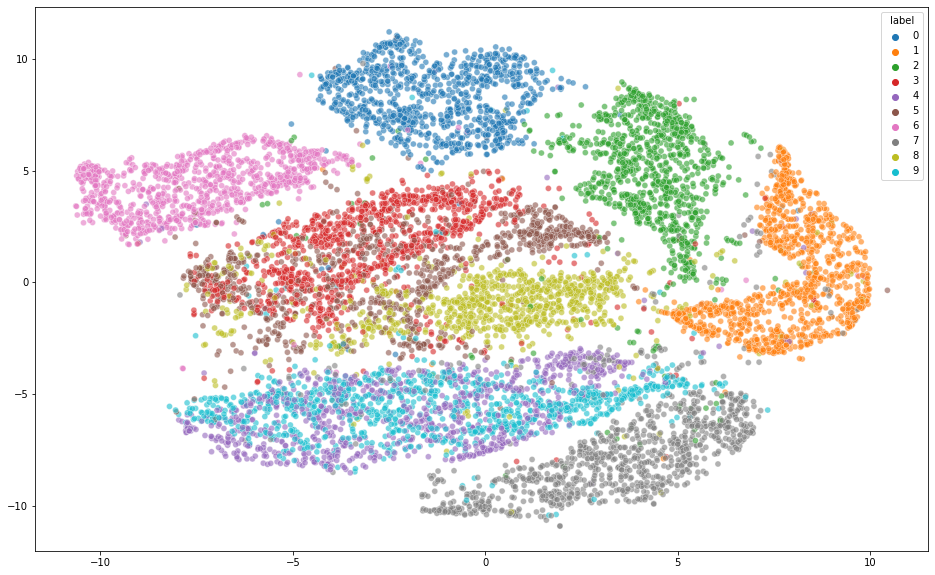

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,10))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=test_df['label'],
                palette=sns.color_palette("tab10"), alpha=0.6)
plt.show()

__Question 5 (4 points).__ Compare with other dimensionality methods: _Locally Linear Embedding_ (LLE) or _Multidimensional scaling_ (MDS).

In [42]:
from sklearn.manifold import LocallyLinearEmbedding

time_start = time.time()

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=123)
mnist_reduced = lle.fit_transform(test_df.loc[:, '1x1':].values)

print(f"Time taken: {time.time() - time_start}")

Time taken: 244.87878608703613


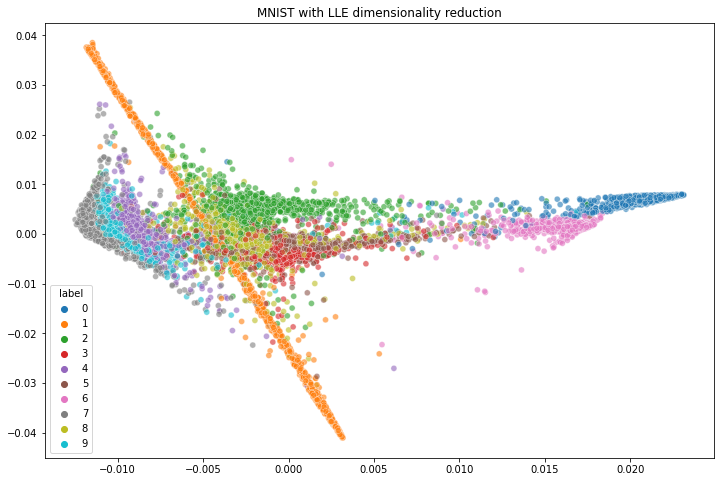

In [43]:
plt.figure(figsize=(12,8))
plt.title("MNIST with LLE dimensionality reduction")
sns.scatterplot(x=mnist_reduced[:, 0],
                y=mnist_reduced[:, 1],
                hue=test_df['label'],
                palette=sns.color_palette('tab10'),
                alpha=0.6)
plt.show()

In comparison between t-SNE and LLE reduction for data explainability through graphs, the LLE graph performs worse than the t-SNE graph. In the former, the assumption is that the lack of "swiss roll" data creates a rather unintuitive shape that ends up doing a relatively poor job of differentiating labels.

Meanwhile, t-SNE distuinguishes between classes better and performs marginally faster (~20 seconds). 